<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\stft"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False


def patchify(data, n_patches):
    n, c, h, w = data.shape
    # Create tensor on the same device as input data
    patches = torch.zeros(n, n_patches**2, (c*h*w) // (n_patches**2), device=data.device)
    patch_size = h // n_patches
    for idx, d in enumerate(data):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = d[:, i*patch_size: (i+1)*patch_size, j*patch_size: (j+1) * patch_size]
                patches[idx, i*n_patches + j] = patch.flatten()
    return patches

def get_positional_embeddings(sequence_length, d, device='cpu'):
    result = torch.ones(sequence_length, d, device=device)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = np.sin(i / (10000 ** (j / d))) if j % 2 == 0 else np.cos(i / (10000 ** ((j - 1) / d)))
    return result

class vit(nn.Module):
    def __init__(self, input_size, n_patches, hidden_size, num_classes,num_transformer_blocks=2,num_heads=4):
        
        super().__init__()
        self.chw = input_size
        self.n_patches = n_patches
        self.patch_size = ((self.chw[1] // n_patches) ** 2) * self.chw[0]
        self.linear_mapper = nn.Linear(self.patch_size, hidden_size)
        self.class_token = nn.Parameter(torch.rand(1, hidden_size))
        self.pos_embed = nn.Parameter(torch.tensor(
                                            get_positional_embeddings(self.n_patches ** 2 + 1, hidden_size), 
                                            device=self.class_token.device
                                        ))
        self.pos_embed.requires_grad = True
        self.layer_norm = nn.LayerNorm(hidden_size)

        # Transformer encoder layers
        self.encoder_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, batch_first=True)
            for _ in range(num_transformer_blocks)
        ])
        self.classifier = nn.Sequential(nn.Linear(hidden_size, num_classes))

        # For saliency maps
        self.gradients = None
        self.activations = None
        self._register_hook = False

    def save_gradient(self, grad):
        self.gradients = grad

    def forward(self, x):
        patches = patchify(x, self.n_patches)
        
        x = self.linear_mapper(patches)
        x = torch.stack([torch.vstack((self.class_token, x[i])) for i in range(len(x))])
        pos_embed = self.pos_embed.repeat(len(x), 1, 1)
        x = x + pos_embed
        x = self.layer_norm(x)

        # Pass through transformer encoder layers
        for idx, layer in enumerate(self.encoder_layers):
            x = layer(x)
            if idx == len(self.encoder_layers) - 1 and not self._register_hook:
                x.register_hook(self.save_gradient)  # Register hook only once
                self._register_hook = True
            self.activations = x  # Save the latest activations

        x = x[:, 0]  # Select CLS token for classification
        x = self.classifier(x)
        return x

    def get_activations_gradient(self):
        return self.gradients

    def get_activations(self):
        return self.activations

    def set_hook(self, hook_status):
        self._register_hook = hook_status

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:

randomdata = torch.randn((1, 3, 224, 224))  # Adjusted to match the input shape (batch_size, channels, height, width)

# Modify the vit parameters to accommodate the shape mismatch
model = vit(input_size=(3, 224, 224), n_patches=14, hidden_size=256, num_classes=2)  # Adjusted n_patches and hidden_size
output = model(randomdata)
output.shape

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


torch.Size([1, 2])

In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
vit                                                          50,688
├─Linear: 1-1                                                196,864
├─LayerNorm: 1-2                                             512
├─ModuleList: 1-3                                            --
│    └─TransformerEncoderLayer: 2-1                          --
│    │    └─MultiheadAttention: 3-1                          263,168
│    │    └─Linear: 3-2                                      526,336
│    │    └─Dropout: 3-3                                     --
│    │    └─Linear: 3-4                                      524,544
│    │    └─LayerNorm: 3-5                                   512
│    │    └─LayerNorm: 3-6                                   512
│    │    └─Dropout: 3-7                                     --
│    │    └─Dropout: 3-8                                     --
│    └─TransformerEncoderLayer: 2-2                          --
│    │  

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(



HYPERPARAMETER SET 1
Parameters: {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 0.0001672579468577945, 'weight_decay': 1.8129496285151885e-05, 'num_transformer_blocks': 6, 'num_heads': 4, 'batch_size': 32}

Fold No: 1
Epoch [1/100], Loss: 0.7086, Accuracy: 0.5080
Validation Loss: 0.6805, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6946, Accuracy: 0.5137
Validation Loss: 0.6796, Validation Accuracy: 0.4993
Epoch [3/100], Loss: 0.6930, Accuracy: 0.5181
Validation Loss: 0.6866, Validation Accuracy: 0.6425
Epoch [4/100], Loss: 0.6571, Accuracy: 0.6544
Validation Loss: 0.6165, Validation Accuracy: 0.7775
Epoch [5/100], Loss: 0.6236, Accuracy: 0.7407
Validation Loss: 0.7052, Validation Accuracy: 0.6835
Epoch [6/100], Loss: 0.6106, Accuracy: 0.7566
Validation Loss: 0.6089, Validation Accuracy: 0.7726
Epoch [7/100], Loss: 0.6000, Accuracy: 0.7721
Validation Loss: 0.6088, Validation Accuracy: 0.7562
Epoch [8/100], Loss: 0.5965, Accuracy: 0.7765
Validation Loss: 0.5839, Validation A

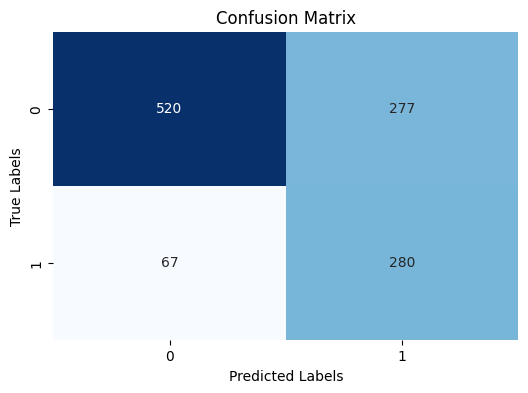


Class-wise Accuracy:
Class 0: 520/797 (65.24%)
Class 1: 280/347 (80.69%)

Precision-Recall Curve:


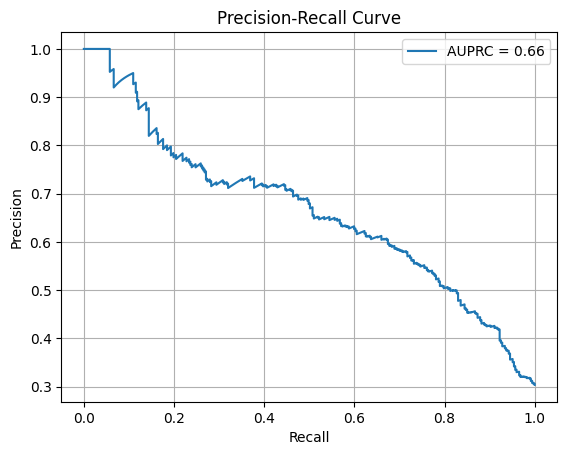


ROC Curve:


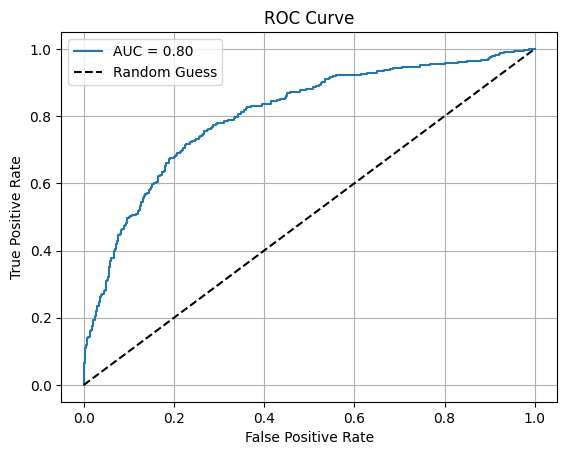


Mean F1 Score: 0.6855
Balanced Accuracy: 0.7297
Average AUPRC: 0.6631

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       797
           1       0.50      0.81      0.62       347

    accuracy                           0.70      1144
   macro avg       0.69      0.73      0.69      1144
weighted avg       0.77      0.70      0.71      1144


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7143, Accuracy: 0.4933
Validation Loss: 0.6842, Validation Accuracy: 0.4987
Epoch [2/100], Loss: 0.6981, Accuracy: 0.4933
Validation Loss: 0.7099, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6979, Accuracy: 0.5071
Validation Loss: 0.7411, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6948, Accuracy: 0.5128
Validation Loss: 0.6812, Validation Accuracy: 0.6436
Epoch [5/100], Loss: 0.6825, Accuracy: 0.5670
Validation Loss: 0.6949, Validation Accuracy: 0.6367
Epoch [6/100], Loss: 0.6618, Accuracy: 0.6416
Validation Loss: 0.6442, Validation Accuracy: 0.6807
Epoch [7/100], Loss: 0.6396, Accuracy: 0.7196
Validation Loss: 0.6439, Validation Accuracy: 0.7128
Epoch [8/100], Loss: 0.6208, Accuracy: 0.7500
Validation Loss: 0.6393, Validation Accuracy: 0.7058
Epoch [9/100], Loss: 0.6142, Accuracy: 0.7490
Validation Loss: 0.6204, Validation Accuracy: 0.6286
Epoch [10/100], Loss: 0.6109, Accuracy: 0.7486
Validation Loss: 0.6488, Validation Accuracy: 0.7264
Epoch [11

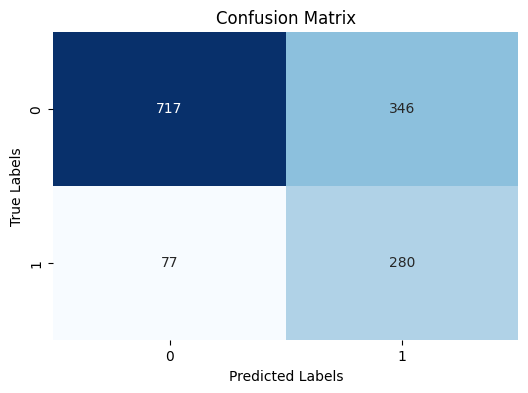


Class-wise Accuracy:
Class 0: 717/1063 (67.45%)
Class 1: 280/357 (78.43%)

Precision-Recall Curve:


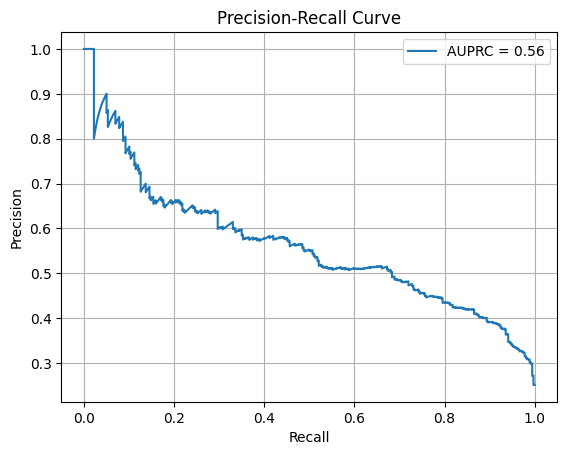


ROC Curve:


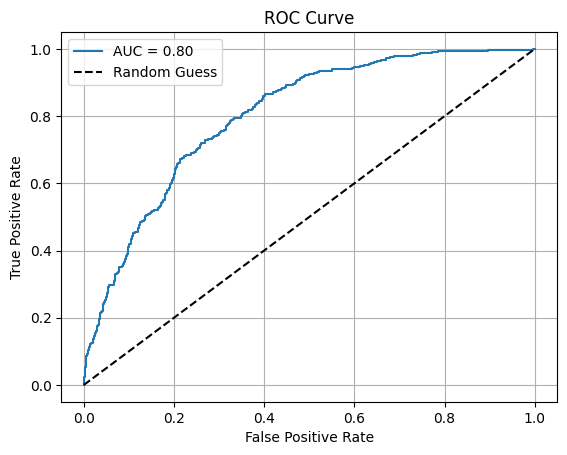


Mean F1 Score: 0.6709
Balanced Accuracy: 0.7294
Average AUPRC: 0.5613

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1063
           1       0.45      0.78      0.57       357

    accuracy                           0.70      1420
   macro avg       0.68      0.73      0.67      1420
weighted avg       0.79      0.70      0.72      1420


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7188, Accuracy: 0.4953
Validation Loss: 0.6724, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6944, Accuracy: 0.5273
Validation Loss: 0.7036, Validation Accuracy: 0.5146
Epoch [3/100], Loss: 0.6924, Accuracy: 0.5395
Validation Loss: 0.7290, Validation Accuracy: 0.5628
Epoch [4/100], Loss: 0.6689, Accuracy: 0.6264
Validation Loss: 0.6899, Validation Accuracy: 0.6757
Epoch [5/100], Loss: 0.6353, Accuracy: 0.7166
Validation Loss: 0.6492, Validation Accuracy: 0.7540
Epoch [6/100], Loss: 0.6174, Accuracy: 0.7500
Validation Loss: 0.6069, Validation Accuracy: 0.7107
Epoch [7/100], Loss: 0.6108, Accuracy: 0.7603
Validation Loss: 0.6879, Validation Accuracy: 0.7309
Epoch [8/100], Loss: 0.6102, Accuracy: 0.7566
Validation Loss: 0.6793, Validation Accuracy: 0.7239
Epoch [9/100], Loss: 0.6142, Accuracy: 0.7566
Validation Loss: 0.6070, Validation Accuracy: 0.6820
Epoch [10/100], Loss: 0.6076, Accuracy: 0.7679
Validation Loss: 0.5984, Validation Accuracy: 0.7195
Epoch [11

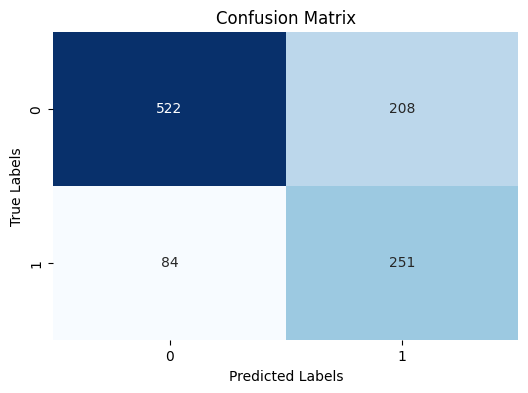


Class-wise Accuracy:
Class 0: 522/730 (71.51%)
Class 1: 251/335 (74.93%)

Precision-Recall Curve:


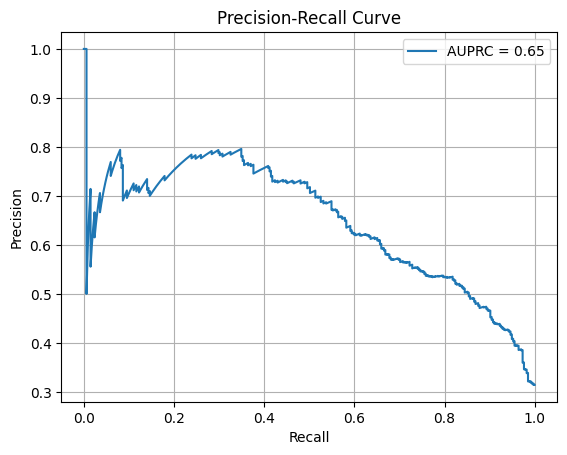


ROC Curve:


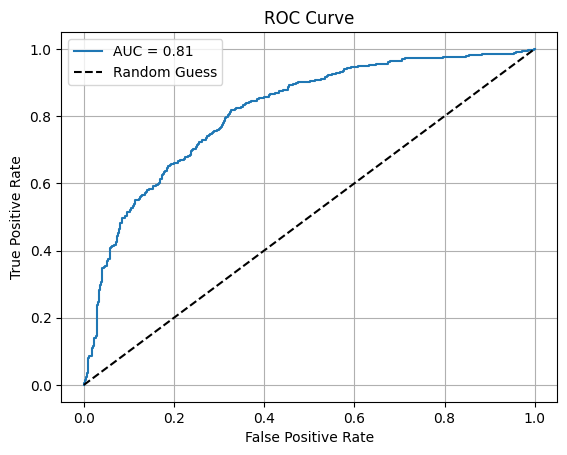


Mean F1 Score: 0.7068
Balanced Accuracy: 0.7322
Average AUPRC: 0.6453

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       730
           1       0.55      0.75      0.63       335

    accuracy                           0.73      1065
   macro avg       0.70      0.73      0.71      1065
weighted avg       0.76      0.73      0.73      1065


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7151, Accuracy: 0.5142
Validation Loss: 0.6631, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6982, Accuracy: 0.5107
Validation Loss: 0.6950, Validation Accuracy: 0.5170
Epoch [3/100], Loss: 0.6961, Accuracy: 0.5010
Validation Loss: 0.7118, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6914, Accuracy: 0.5270
Validation Loss: 0.6703, Validation Accuracy: 0.5236
Epoch [5/100], Loss: 0.6863, Accuracy: 0.5722
Validation Loss: 0.6665, Validation Accuracy: 0.6860
Epoch [6/100], Loss: 0.6614, Accuracy: 0.6445
Validation Loss: 0.6459, Validation Accuracy: 0.6987
Epoch [7/100], Loss: 0.6320, Accuracy: 0.7116
Validation Loss: 0.6121, Validation Accuracy: 0.7180
Epoch [8/100], Loss: 0.6293, Accuracy: 0.7223
Validation Loss: 0.7143, Validation Accuracy: 0.7031
Epoch [9/100], Loss: 0.6036, Accuracy: 0.7670
Validation Loss: 0.5886, Validation Accuracy: 0.7628
Epoch [10/100], Loss: 0.6153, Accuracy: 0.7431
Validation Loss: 0.6593, Validation Accuracy: 0.7092
Epoch [11

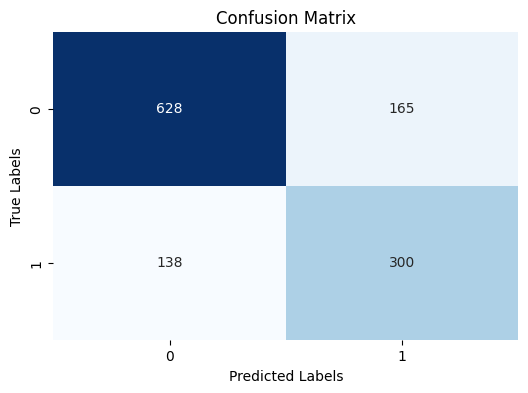


Class-wise Accuracy:
Class 0: 628/793 (79.19%)
Class 1: 300/438 (68.49%)

Precision-Recall Curve:


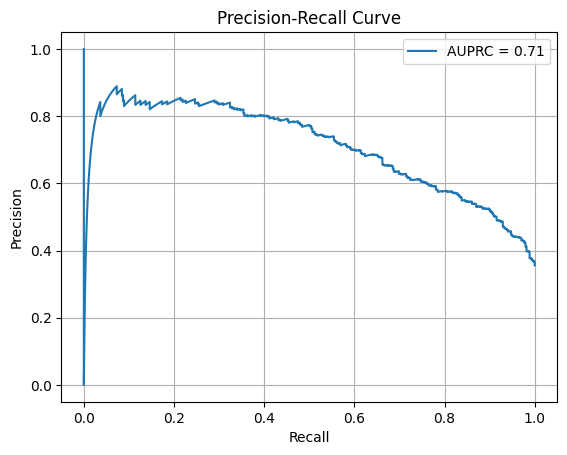


ROC Curve:


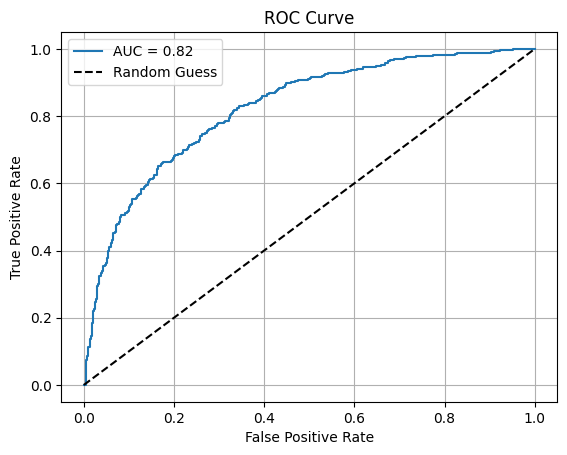


Mean F1 Score: 0.7350
Balanced Accuracy: 0.7384
Average AUPRC: 0.7068

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       793
           1       0.65      0.68      0.66       438

    accuracy                           0.75      1231
   macro avg       0.73      0.74      0.74      1231
weighted avg       0.76      0.75      0.76      1231


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7207, Accuracy: 0.4803
Validation Loss: 0.7033, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6954, Accuracy: 0.4957
Validation Loss: 0.6959, Validation Accuracy: 0.5183
Epoch [3/100], Loss: 0.6926, Accuracy: 0.5289
Validation Loss: 0.6950, Validation Accuracy: 0.6188
Epoch [4/100], Loss: 0.6791, Accuracy: 0.5900
Validation Loss: 0.6320, Validation Accuracy: 0.6380
Epoch [5/100], Loss: 0.6397, Accuracy: 0.7089
Validation Loss: 0.6234, Validation Accuracy: 0.7212
Epoch [6/100], Loss: 0.6259, Accuracy: 0.7315
Validation Loss: 0.6300, Validation Accuracy: 0.7217
Epoch [7/100], Loss: 0.6190, Accuracy: 0.7454
Validation Loss: 0.6592, Validation Accuracy: 0.6954
Epoch [8/100], Loss: 0.6172, Accuracy: 0.7464
Validation Loss: 0.6230, Validation Accuracy: 0.7356
Epoch [9/100], Loss: 0.6062, Accuracy: 0.7584
Validation Loss: 0.6104, Validation Accuracy: 0.7179
Epoch [10/100], Loss: 0.6072, Accuracy: 0.7647
Validation Loss: 0.6936, Validation Accuracy: 0.7063
Epoch [11

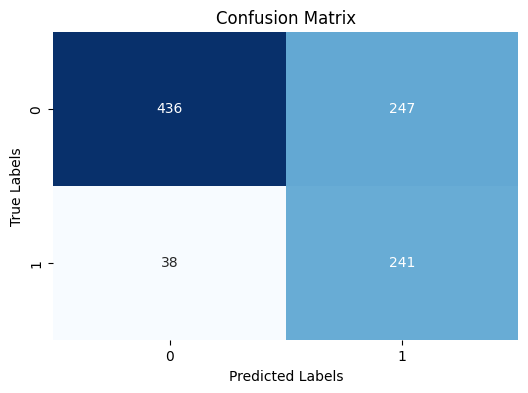


Class-wise Accuracy:
Class 0: 436/683 (63.84%)
Class 1: 241/279 (86.38%)

Precision-Recall Curve:


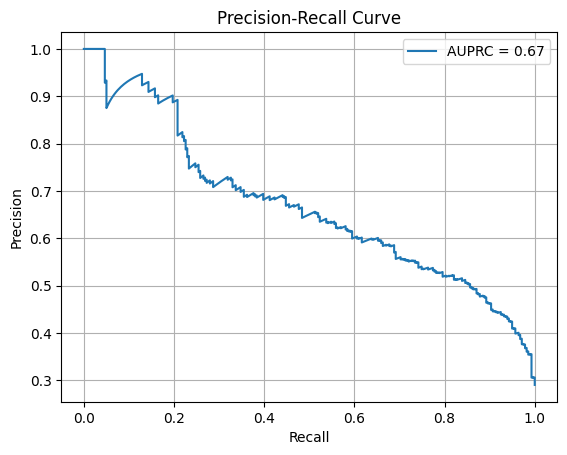


ROC Curve:


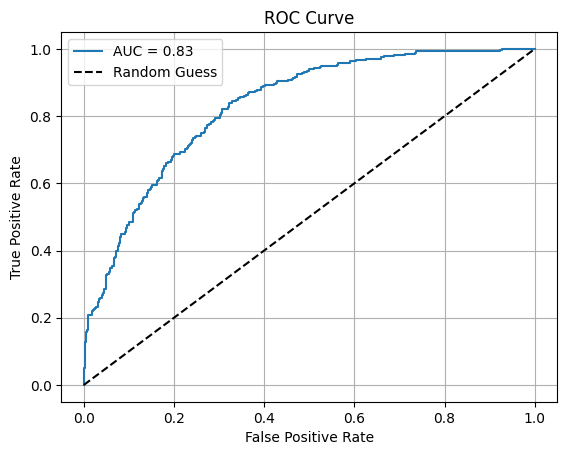


Mean F1 Score: 0.6910
Balanced Accuracy: 0.7511
Average AUPRC: 0.6675

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       683
           1       0.49      0.86      0.63       279

    accuracy                           0.70       962
   macro avg       0.71      0.75      0.69       962
weighted avg       0.80      0.70      0.72       962


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 1:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.7297', '0.7294', '0.7322', '0.7384', '0.7511']
Average Balanced Accuracy across all folds: 0.7362
AUPRC for each fold: ['0.6631', '0.5613', '0.6453', '0.7068', '0.6675']
Average AUPRC across all folds: 0.6488
Best fold (Fold 5) class-wise accuracy:
  Class 0: Precision=0.9198, Recall=0.6384, F1=0.7537
  Class 1: Precision=0.4939, Recall=0.8638, F1=0.6284
  Macro Avg: Precision=0.70

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6993, Accuracy: 0.5217
Validation Loss: 0.6782, Validation Accuracy: 0.6595
Epoch [2/100], Loss: 0.6769, Accuracy: 0.6075
Validation Loss: 0.7149, Validation Accuracy: 0.6172
Epoch [3/100], Loss: 0.6552, Accuracy: 0.6686
Validation Loss: 0.6228, Validation Accuracy: 0.6952
Epoch [4/100], Loss: 0.6367, Accuracy: 0.7031
Validation Loss: 0.6088, Validation Accuracy: 0.7206
Epoch [5/100], Loss: 0.6270, Accuracy: 0.7235
Validation Loss: 0.5928, Validation Accuracy: 0.7146
Epoch [6/100], Loss: 0.6237, Accuracy: 0.7301
Validation Loss: 0.6244, Validation Accuracy: 0.7580
Epoch [7/100], Loss: 0.6131, Accuracy: 0.7518
Validation Loss: 0.6448, Validation Accuracy: 0.7408
Epoch [8/100], Loss: 0.6124, Accuracy: 0.7460
Validation Loss: 0.6266, Validation Accuracy: 0.7606
Epoch [9/100], Loss: 0.6059, Accuracy: 0.7628
Validation Loss: 0.6461, Validation Accuracy: 0.7511
Epoch [10/100], Loss: 0.6001, Accuracy: 0.7726
Validation Loss: 0.6017, Validation Accuracy: 0.7708
Epoch [11

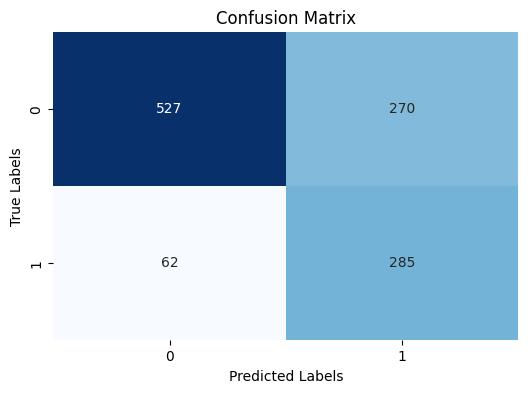


Class-wise Accuracy:
Class 0: 527/797 (66.12%)
Class 1: 285/347 (82.13%)

Precision-Recall Curve:


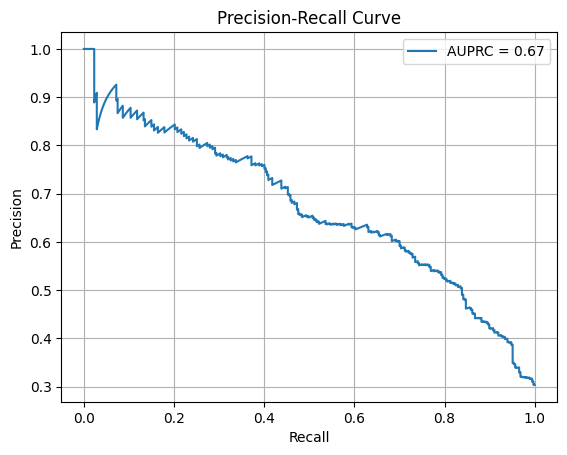


ROC Curve:


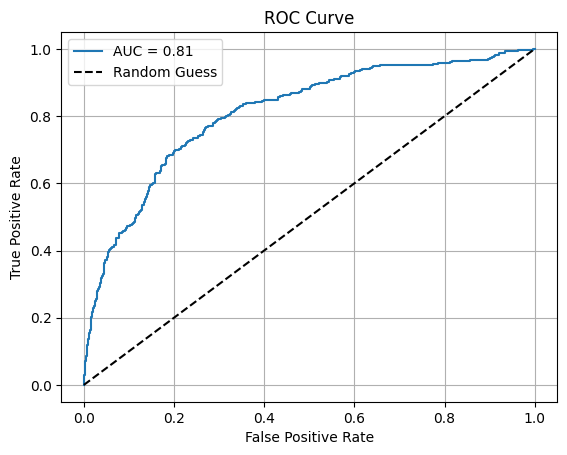


Mean F1 Score: 0.6962
Balanced Accuracy: 0.7413
Average AUPRC: 0.6691

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       797
           1       0.51      0.82      0.63       347

    accuracy                           0.71      1144
   macro avg       0.70      0.74      0.70      1144
weighted avg       0.78      0.71      0.72      1144


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6987, Accuracy: 0.5366
Validation Loss: 0.6509, Validation Accuracy: 0.5089
Epoch [2/100], Loss: 0.6832, Accuracy: 0.5813
Validation Loss: 0.6938, Validation Accuracy: 0.6494
Epoch [3/100], Loss: 0.6657, Accuracy: 0.6393
Validation Loss: 0.6321, Validation Accuracy: 0.6869
Epoch [4/100], Loss: 0.6489, Accuracy: 0.6873
Validation Loss: 0.7498, Validation Accuracy: 0.6396
Epoch [5/100], Loss: 0.6396, Accuracy: 0.6996
Validation Loss: 0.6273, Validation Accuracy: 0.7003
Epoch [6/100], Loss: 0.6329, Accuracy: 0.7158
Validation Loss: 0.6615, Validation Accuracy: 0.7089
Epoch [7/100], Loss: 0.6202, Accuracy: 0.7410
Validation Loss: 0.6553, Validation Accuracy: 0.7082
Epoch [8/100], Loss: 0.6188, Accuracy: 0.7367
Validation Loss: 0.6486, Validation Accuracy: 0.7114
Epoch [9/100], Loss: 0.6154, Accuracy: 0.7443
Validation Loss: 0.6361, Validation Accuracy: 0.7073
Epoch [10/100], Loss: 0.6030, Accuracy: 0.7709
Validation Loss: 0.6386, Validation Accuracy: 0.7041
Epoch [11

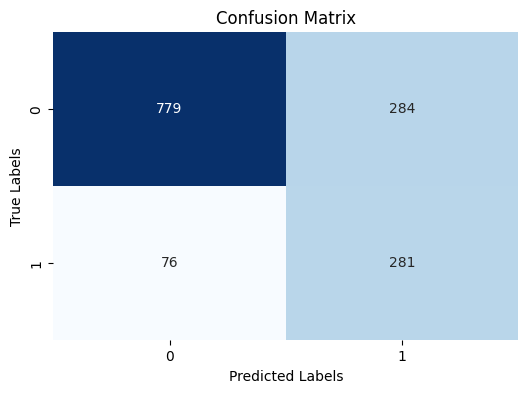


Class-wise Accuracy:
Class 0: 779/1063 (73.28%)
Class 1: 281/357 (78.71%)

Precision-Recall Curve:


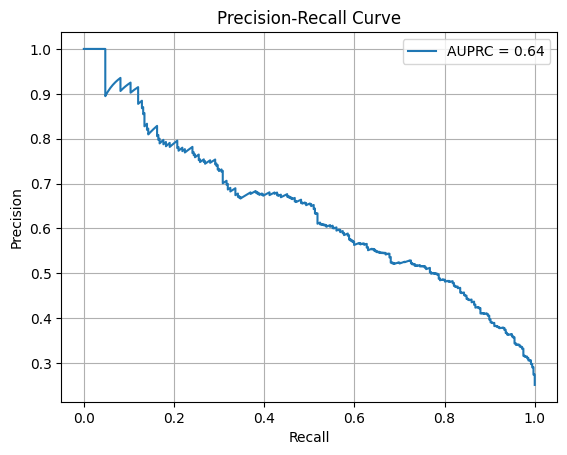


ROC Curve:


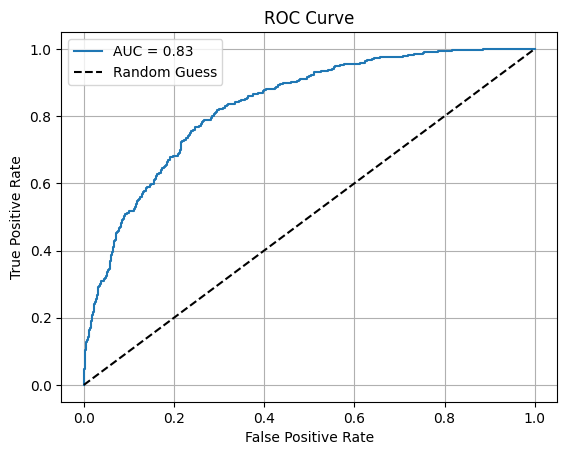


Mean F1 Score: 0.7109
Balanced Accuracy: 0.7600
Average AUPRC: 0.6370

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1063
           1       0.50      0.79      0.61       357

    accuracy                           0.75      1420
   macro avg       0.70      0.76      0.71      1420
weighted avg       0.81      0.75      0.76      1420


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6968, Accuracy: 0.5348
Validation Loss: 0.6877, Validation Accuracy: 0.6044
Epoch [2/100], Loss: 0.6834, Accuracy: 0.5832
Validation Loss: 0.6560, Validation Accuracy: 0.6662
Epoch [3/100], Loss: 0.6626, Accuracy: 0.6565
Validation Loss: 0.6507, Validation Accuracy: 0.6730
Epoch [4/100], Loss: 0.6478, Accuracy: 0.6903
Validation Loss: 0.6722, Validation Accuracy: 0.6988
Epoch [5/100], Loss: 0.6434, Accuracy: 0.6969
Validation Loss: 0.6554, Validation Accuracy: 0.7102
Epoch [6/100], Loss: 0.6422, Accuracy: 0.7021
Validation Loss: 0.5999, Validation Accuracy: 0.6834
Epoch [7/100], Loss: 0.6239, Accuracy: 0.7340
Validation Loss: 0.6649, Validation Accuracy: 0.7226
Epoch [8/100], Loss: 0.6219, Accuracy: 0.7373
Validation Loss: 0.6439, Validation Accuracy: 0.7378
Epoch [9/100], Loss: 0.6128, Accuracy: 0.7556
Validation Loss: 0.6247, Validation Accuracy: 0.7291
Epoch [10/100], Loss: 0.6148, Accuracy: 0.7462
Validation Loss: 0.6386, Validation Accuracy: 0.7368
Epoch [11

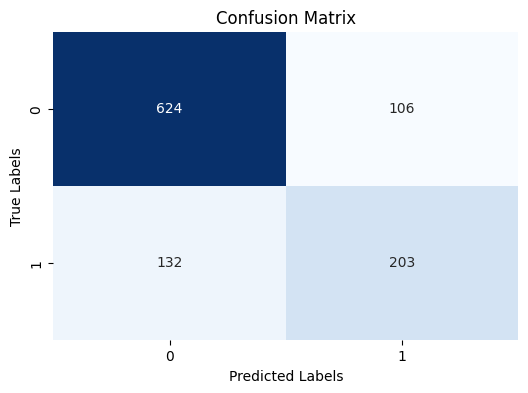


Class-wise Accuracy:
Class 0: 624/730 (85.48%)
Class 1: 203/335 (60.60%)

Precision-Recall Curve:


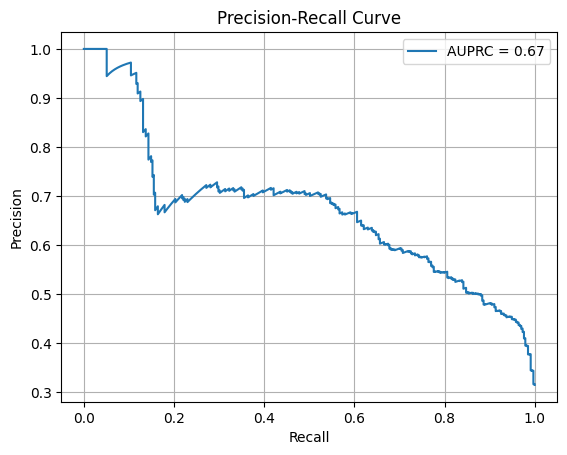


ROC Curve:


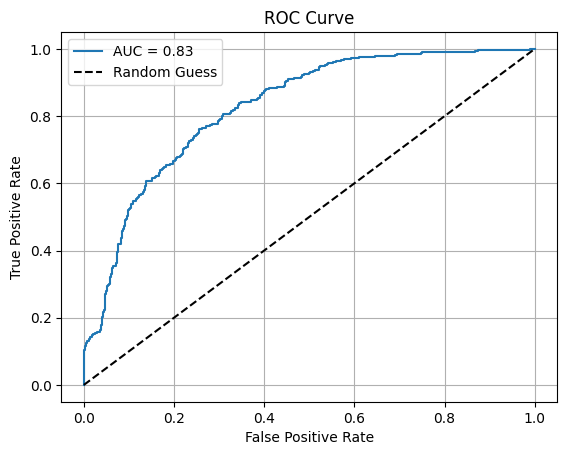


Mean F1 Score: 0.7351
Balanced Accuracy: 0.7304
Average AUPRC: 0.6710

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       730
           1       0.66      0.61      0.63       335

    accuracy                           0.78      1065
   macro avg       0.74      0.73      0.74      1065
weighted avg       0.77      0.78      0.77      1065


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6930, Accuracy: 0.5443
Validation Loss: 0.7649, Validation Accuracy: 0.5163
Epoch [2/100], Loss: 0.6826, Accuracy: 0.5870
Validation Loss: 0.7047, Validation Accuracy: 0.6104
Epoch [3/100], Loss: 0.6670, Accuracy: 0.6358
Validation Loss: 0.6896, Validation Accuracy: 0.6759
Epoch [4/100], Loss: 0.6542, Accuracy: 0.6612
Validation Loss: 0.7565, Validation Accuracy: 0.6253
Epoch [5/100], Loss: 0.6503, Accuracy: 0.6872
Validation Loss: 0.6411, Validation Accuracy: 0.7183
Epoch [6/100], Loss: 0.6428, Accuracy: 0.6968
Validation Loss: 0.6406, Validation Accuracy: 0.7143
Epoch [7/100], Loss: 0.6348, Accuracy: 0.7101
Validation Loss: 0.6766, Validation Accuracy: 0.7118
Epoch [8/100], Loss: 0.6287, Accuracy: 0.7284
Validation Loss: 0.7072, Validation Accuracy: 0.7052
Epoch [9/100], Loss: 0.6218, Accuracy: 0.7350
Validation Loss: 0.6232, Validation Accuracy: 0.6988
Epoch [10/100], Loss: 0.6235, Accuracy: 0.7294
Validation Loss: 0.7387, Validation Accuracy: 0.6884
Epoch [11

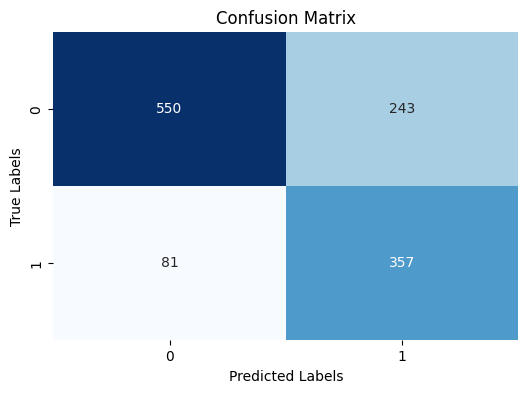


Class-wise Accuracy:
Class 0: 550/793 (69.36%)
Class 1: 357/438 (81.51%)

Precision-Recall Curve:


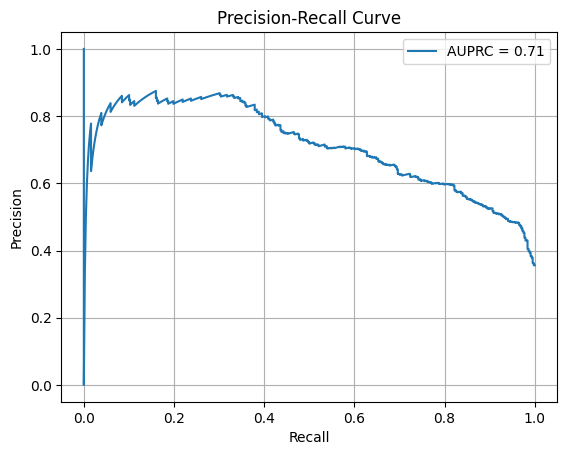


ROC Curve:


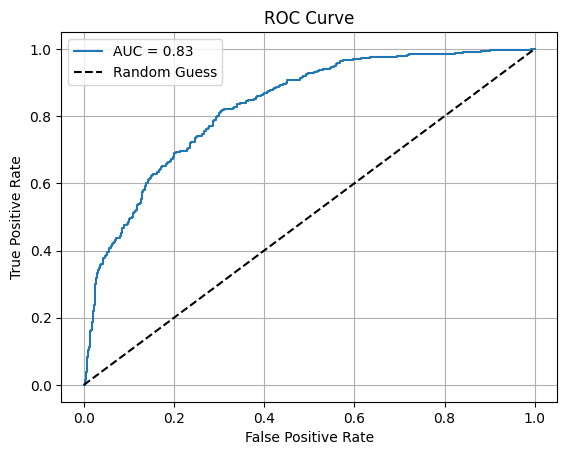


Mean F1 Score: 0.7302
Balanced Accuracy: 0.7543
Average AUPRC: 0.7096

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       793
           1       0.59      0.82      0.69       438

    accuracy                           0.74      1231
   macro avg       0.73      0.75      0.73      1231
weighted avg       0.77      0.74      0.74      1231


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6971, Accuracy: 0.5289
Validation Loss: 0.6971, Validation Accuracy: 0.6073
Epoch [2/100], Loss: 0.6803, Accuracy: 0.5885
Validation Loss: 0.6683, Validation Accuracy: 0.6359
Epoch [3/100], Loss: 0.6665, Accuracy: 0.6285
Validation Loss: 0.6603, Validation Accuracy: 0.6686
Epoch [4/100], Loss: 0.6517, Accuracy: 0.6708
Validation Loss: 0.6362, Validation Accuracy: 0.6581
Epoch [5/100], Loss: 0.6474, Accuracy: 0.6891
Validation Loss: 0.6524, Validation Accuracy: 0.6834
Epoch [6/100], Loss: 0.6408, Accuracy: 0.7012
Validation Loss: 0.6260, Validation Accuracy: 0.7089
Epoch [7/100], Loss: 0.6236, Accuracy: 0.7214
Validation Loss: 0.6648, Validation Accuracy: 0.6891
Epoch [8/100], Loss: 0.6193, Accuracy: 0.7348
Validation Loss: 0.6365, Validation Accuracy: 0.7076
Epoch [9/100], Loss: 0.6119, Accuracy: 0.7570
Validation Loss: 0.6166, Validation Accuracy: 0.7341
Epoch [10/100], Loss: 0.6099, Accuracy: 0.7584
Validation Loss: 0.6503, Validation Accuracy: 0.7104
Epoch [11

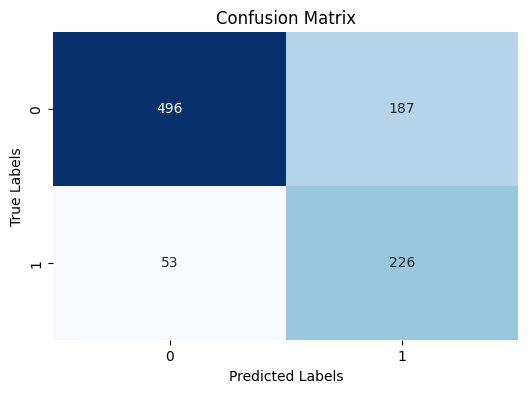


Class-wise Accuracy:
Class 0: 496/683 (72.62%)
Class 1: 226/279 (81.00%)

Precision-Recall Curve:


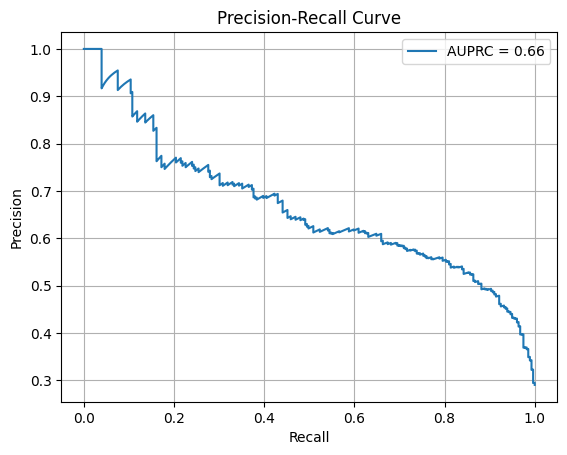


ROC Curve:


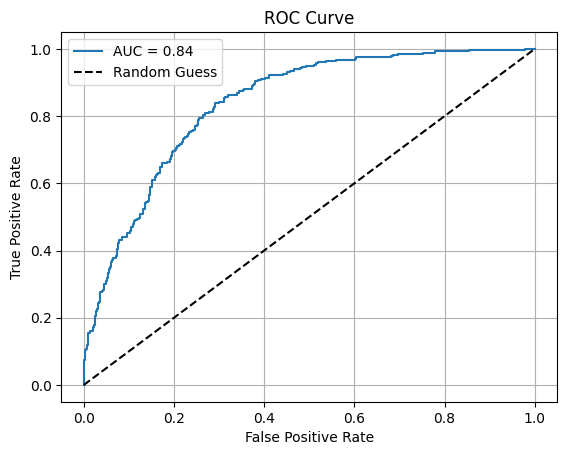


Mean F1 Score: 0.7292
Balanced Accuracy: 0.7681
Average AUPRC: 0.6627

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       683
           1       0.55      0.81      0.65       279

    accuracy                           0.75       962
   macro avg       0.73      0.77      0.73       962
weighted avg       0.80      0.75      0.76       962


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 2:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.7413', '0.7600', '0.7304', '0.7543', '0.7681']
Average Balanced Accuracy across all folds: 0.7508
AUPRC for each fold: ['0.6691', '0.6370', '0.6710', '0.7096', '0.6627']
Average AUPRC across all folds: 0.6699
Best fold (Fold 5) class-wise accuracy:
  Class 0: Precision=0.9035, Recall=0.7262, F1=0.8052
  Class 1: Precision=0.5472, Recall=0.8100, F1=0.6532
  Macro Avg: Precision=0.72

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7100, Accuracy: 0.4876
Validation Loss: 0.6917, Validation Accuracy: 0.5457
Epoch [2/100], Loss: 0.6977, Accuracy: 0.5128
Validation Loss: 0.6997, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6936, Accuracy: 0.5257
Validation Loss: 0.7025, Validation Accuracy: 0.5968
Epoch [4/100], Loss: 0.6687, Accuracy: 0.6204
Validation Loss: 0.6273, Validation Accuracy: 0.7442
Epoch [5/100], Loss: 0.6381, Accuracy: 0.7097
Validation Loss: 0.5747, Validation Accuracy: 0.7606
Epoch [6/100], Loss: 0.6284, Accuracy: 0.7274
Validation Loss: 0.6030, Validation Accuracy: 0.7909
Epoch [7/100], Loss: 0.6172, Accuracy: 0.7451
Validation Loss: 0.6616, Validation Accuracy: 0.7292
Epoch [8/100], Loss: 0.6119, Accuracy: 0.7496
Validation Loss: 0.6119, Validation Accuracy: 0.7843
Epoch [9/100], Loss: 0.6037, Accuracy: 0.7681
Validation Loss: 0.6103, Validation Accuracy: 0.7839
Epoch [10/100], Loss: 0.6018, Accuracy: 0.7659
Validation Loss: 0.6086, Validation Accuracy: 0.7890
Epoch [11

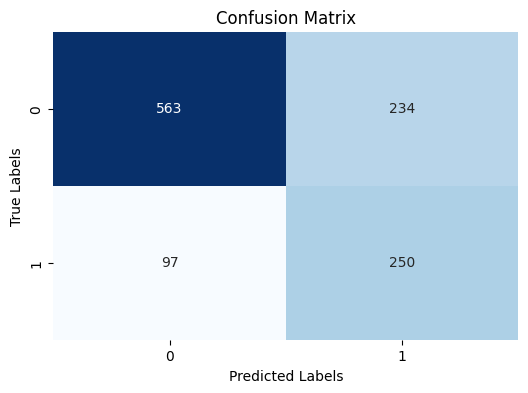


Class-wise Accuracy:
Class 0: 563/797 (70.64%)
Class 1: 250/347 (72.05%)

Precision-Recall Curve:


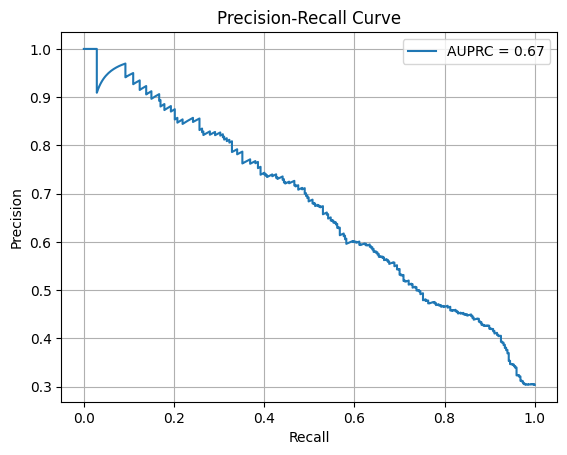


ROC Curve:


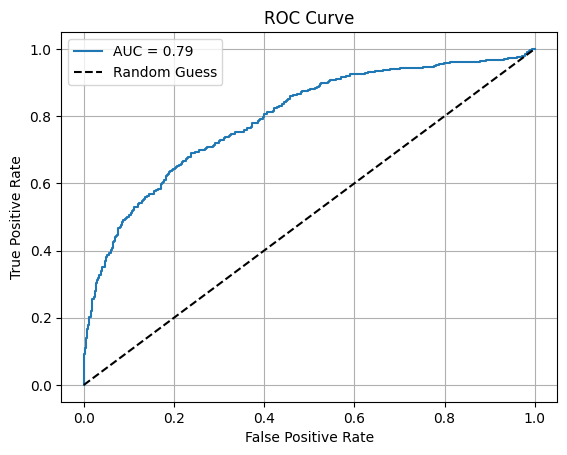


Mean F1 Score: 0.6873
Balanced Accuracy: 0.7134
Average AUPRC: 0.6728

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       797
           1       0.52      0.72      0.60       347

    accuracy                           0.71      1144
   macro avg       0.68      0.71      0.69      1144
weighted avg       0.75      0.71      0.72      1144


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6996, Accuracy: 0.5152
Validation Loss: 0.6834, Validation Accuracy: 0.6196
Epoch [2/100], Loss: 0.6880, Accuracy: 0.5646
Validation Loss: 0.6759, Validation Accuracy: 0.6627
Epoch [3/100], Loss: 0.6585, Accuracy: 0.6483
Validation Loss: 0.8447, Validation Accuracy: 0.5777
Epoch [4/100], Loss: 0.6446, Accuracy: 0.6778
Validation Loss: 0.6531, Validation Accuracy: 0.6960
Epoch [5/100], Loss: 0.6166, Accuracy: 0.7414
Validation Loss: 0.6363, Validation Accuracy: 0.7259
Epoch [6/100], Loss: 0.6123, Accuracy: 0.7557
Validation Loss: 0.6245, Validation Accuracy: 0.7117
Epoch [7/100], Loss: 0.6031, Accuracy: 0.7652
Validation Loss: 0.6540, Validation Accuracy: 0.7238
Epoch [8/100], Loss: 0.6008, Accuracy: 0.7719
Validation Loss: 0.6814, Validation Accuracy: 0.7042
Epoch [9/100], Loss: 0.5992, Accuracy: 0.7780
Validation Loss: 0.6509, Validation Accuracy: 0.7247
Epoch [10/100], Loss: 0.5841, Accuracy: 0.7947
Validation Loss: 0.6174, Validation Accuracy: 0.6804
Epoch [11

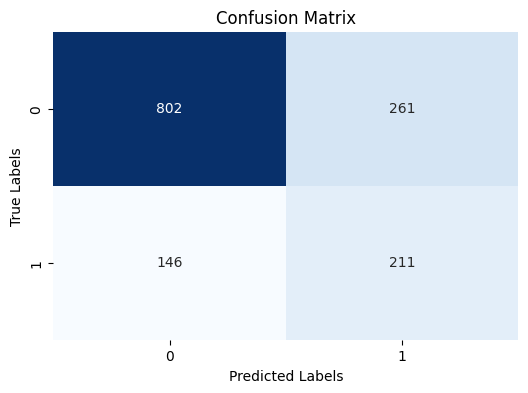


Class-wise Accuracy:
Class 0: 802/1063 (75.45%)
Class 1: 211/357 (59.10%)

Precision-Recall Curve:


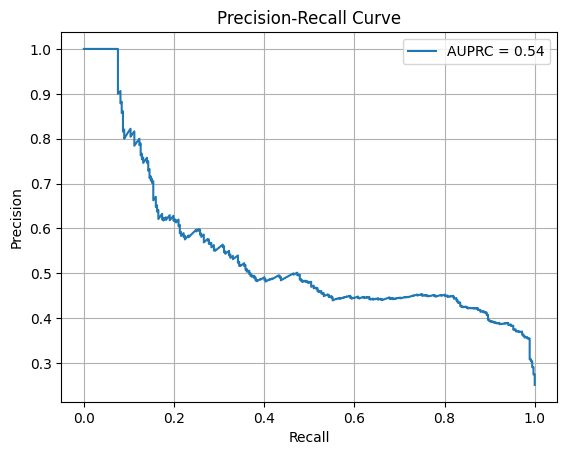


ROC Curve:


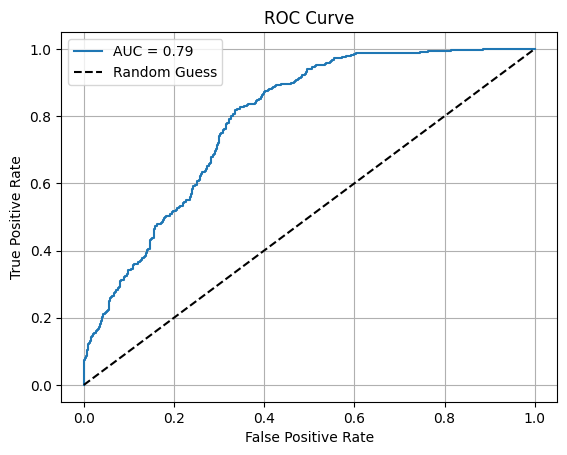


Mean F1 Score: 0.6533
Balanced Accuracy: 0.6728
Average AUPRC: 0.5404

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1063
           1       0.45      0.59      0.51       357

    accuracy                           0.71      1420
   macro avg       0.65      0.67      0.65      1420
weighted avg       0.75      0.71      0.73      1420


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7064, Accuracy: 0.5150
Validation Loss: 0.7205, Validation Accuracy: 0.5028
Epoch [2/100], Loss: 0.6902, Accuracy: 0.5423
Validation Loss: 0.7309, Validation Accuracy: 0.5591
Epoch [3/100], Loss: 0.6735, Accuracy: 0.6090
Validation Loss: 0.6531, Validation Accuracy: 0.6201
Epoch [4/100], Loss: 0.6404, Accuracy: 0.6997
Validation Loss: 0.6272, Validation Accuracy: 0.7137
Epoch [5/100], Loss: 0.6365, Accuracy: 0.7256
Validation Loss: 0.5886, Validation Accuracy: 0.6663
Epoch [6/100], Loss: 0.6259, Accuracy: 0.7345
Validation Loss: 0.6028, Validation Accuracy: 0.7051
Epoch [7/100], Loss: 0.6087, Accuracy: 0.7636
Validation Loss: 0.5956, Validation Accuracy: 0.7108
Epoch [8/100], Loss: 0.6035, Accuracy: 0.7749
Validation Loss: 0.6016, Validation Accuracy: 0.7144
Epoch [9/100], Loss: 0.5961, Accuracy: 0.7763
Validation Loss: 0.7240, Validation Accuracy: 0.7375
Epoch [10/100], Loss: 0.6033, Accuracy: 0.7740
Validation Loss: 0.5841, Validation Accuracy: 0.7040
Epoch [11

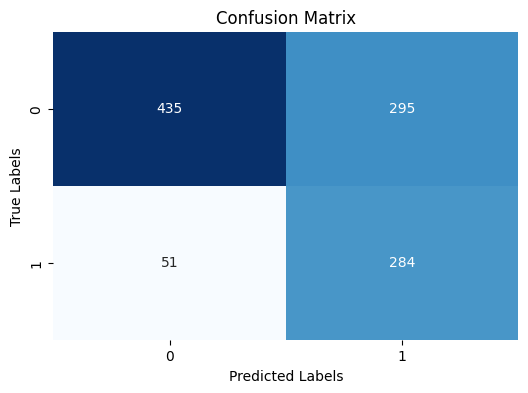


Class-wise Accuracy:
Class 0: 435/730 (59.59%)
Class 1: 284/335 (84.78%)

Precision-Recall Curve:


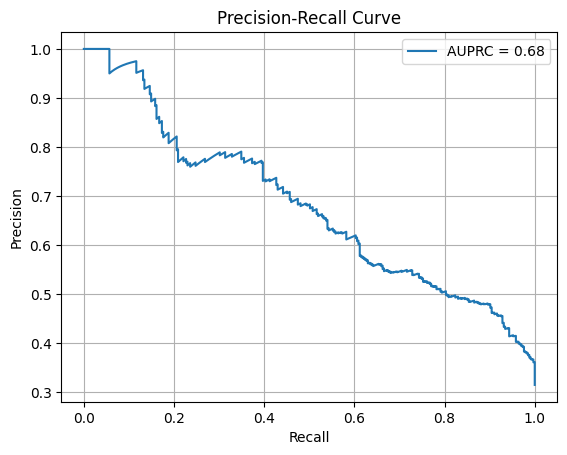


ROC Curve:


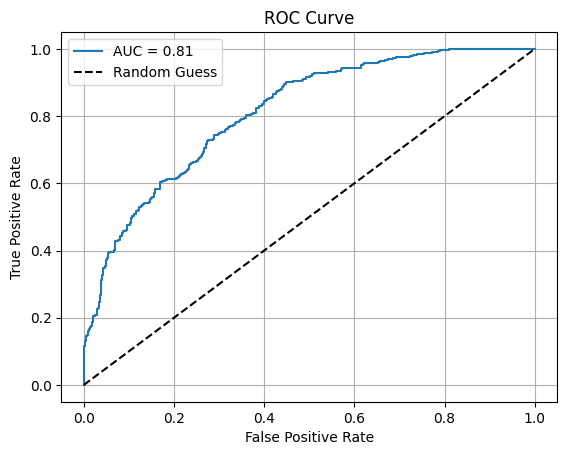


Mean F1 Score: 0.6685
Balanced Accuracy: 0.7218
Average AUPRC: 0.6778

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       730
           1       0.49      0.85      0.62       335

    accuracy                           0.68      1065
   macro avg       0.69      0.72      0.67      1065
weighted avg       0.77      0.68      0.69      1065


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7087, Accuracy: 0.5117
Validation Loss: 0.7342, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6960, Accuracy: 0.5158
Validation Loss: 0.6678, Validation Accuracy: 0.5097
Epoch [3/100], Loss: 0.6803, Accuracy: 0.5956
Validation Loss: 0.7273, Validation Accuracy: 0.6067
Epoch [4/100], Loss: 0.6523, Accuracy: 0.6658
Validation Loss: 0.7243, Validation Accuracy: 0.6848
Epoch [5/100], Loss: 0.6346, Accuracy: 0.7228
Validation Loss: 0.6155, Validation Accuracy: 0.7051
Epoch [6/100], Loss: 0.6244, Accuracy: 0.7391
Validation Loss: 0.6361, Validation Accuracy: 0.7463
Epoch [7/100], Loss: 0.6100, Accuracy: 0.7569
Validation Loss: 0.6167, Validation Accuracy: 0.7602
Epoch [8/100], Loss: 0.6143, Accuracy: 0.7533
Validation Loss: 0.6381, Validation Accuracy: 0.7391
Epoch [9/100], Loss: 0.6037, Accuracy: 0.7670
Validation Loss: 0.6072, Validation Accuracy: 0.7743
Epoch [10/100], Loss: 0.5914, Accuracy: 0.7823
Validation Loss: 0.6800, Validation Accuracy: 0.7370
Epoch [11

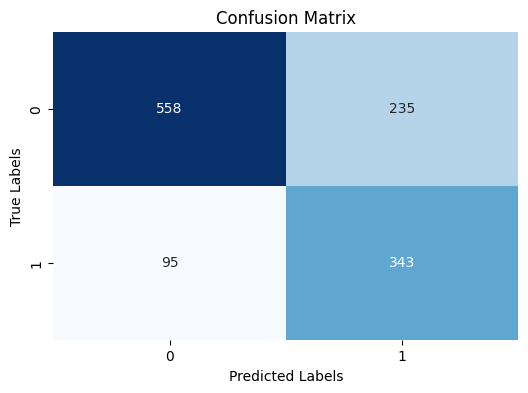


Class-wise Accuracy:
Class 0: 558/793 (70.37%)
Class 1: 343/438 (78.31%)

Precision-Recall Curve:


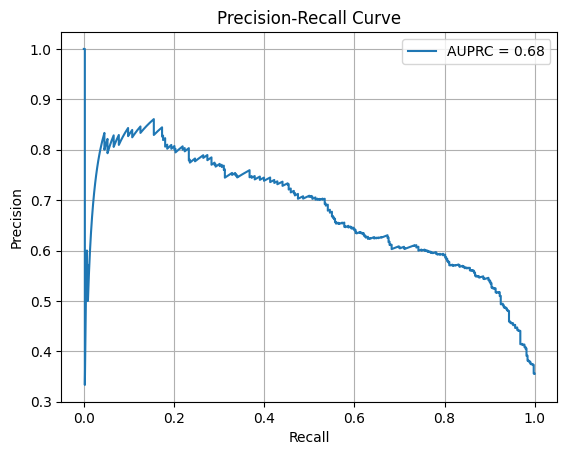


ROC Curve:


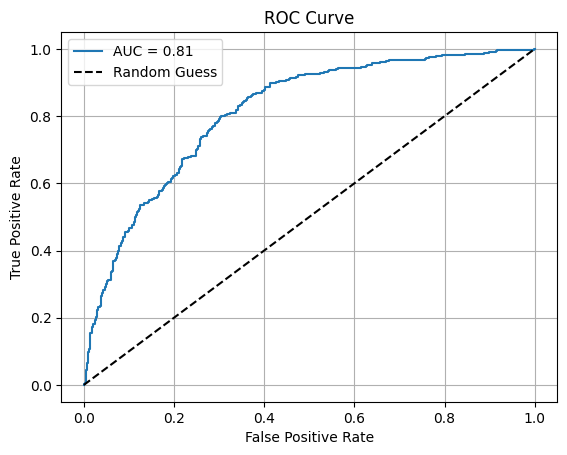


Mean F1 Score: 0.7235
Balanced Accuracy: 0.7434
Average AUPRC: 0.6779

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       793
           1       0.59      0.78      0.68       438

    accuracy                           0.73      1231
   macro avg       0.72      0.74      0.72      1231
weighted avg       0.76      0.73      0.74      1231


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_31012\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7146, Accuracy: 0.5183
Validation Loss: 0.6818, Validation Accuracy: 0.4943
Epoch [2/100], Loss: 0.6964, Accuracy: 0.4976
Validation Loss: 0.7046, Validation Accuracy: 0.5095
Epoch [3/100], Loss: 0.6858, Accuracy: 0.5664
Validation Loss: 0.6590, Validation Accuracy: 0.5010
Epoch [4/100], Loss: 0.6602, Accuracy: 0.6603
Validation Loss: 0.6396, Validation Accuracy: 0.6343
Epoch [5/100], Loss: 0.6414, Accuracy: 0.7026
Validation Loss: 0.6333, Validation Accuracy: 0.7163
Epoch [6/100], Loss: 0.6199, Accuracy: 0.7329
Validation Loss: 0.6262, Validation Accuracy: 0.6981
Epoch [7/100], Loss: 0.6166, Accuracy: 0.7392
Validation Loss: 0.6266, Validation Accuracy: 0.6724
Epoch [8/100], Loss: 0.6014, Accuracy: 0.7690
Validation Loss: 0.6851, Validation Accuracy: 0.6939
Epoch [9/100], Loss: 0.6072, Accuracy: 0.7599
Validation Loss: 0.6156, Validation Accuracy: 0.7015
Epoch [10/100], Loss: 0.6142, Accuracy: 0.7570
Validation Loss: 0.6645, Validation Accuracy: 0.7072
Epoch [11

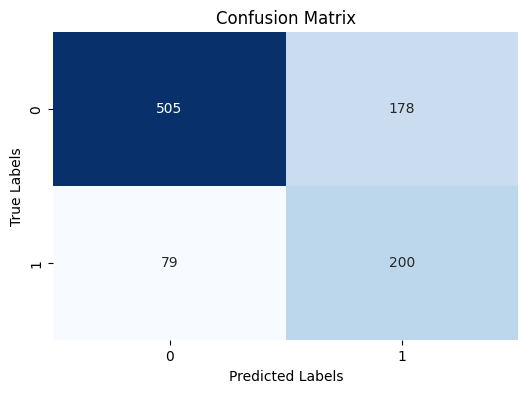


Class-wise Accuracy:
Class 0: 505/683 (73.94%)
Class 1: 200/279 (71.68%)

Precision-Recall Curve:


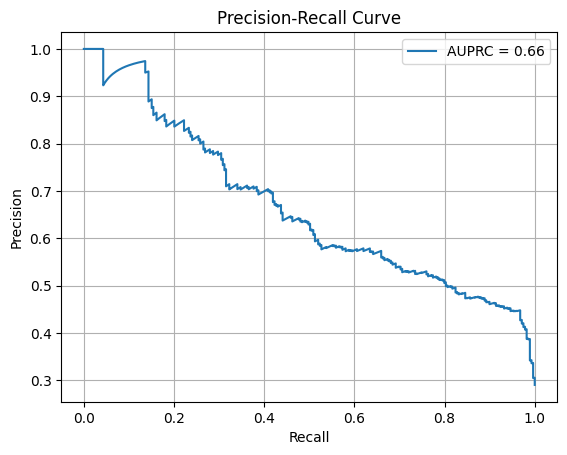


ROC Curve:


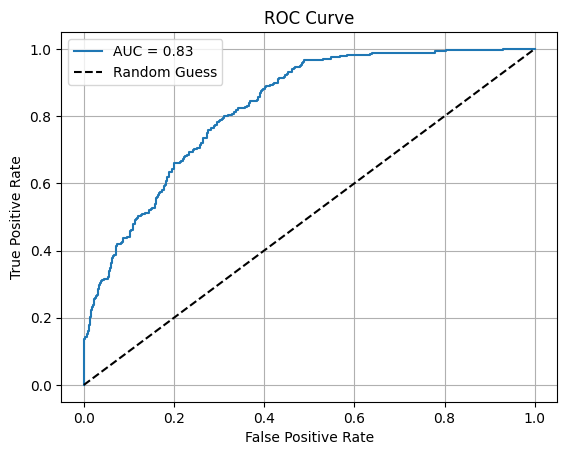


Mean F1 Score: 0.7030
Balanced Accuracy: 0.7281
Average AUPRC: 0.6643

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       683
           1       0.53      0.72      0.61       279

    accuracy                           0.73       962
   macro avg       0.70      0.73      0.70       962
weighted avg       0.77      0.73      0.74       962


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 3:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.7134', '0.6728', '0.7218', '0.7434', '0.7281']
Average Balanced Accuracy across all folds: 0.7159
AUPRC for each fold: ['0.6728', '0.5404', '0.6778', '0.6779', '0.6643']
Average AUPRC across all folds: 0.6466
Best fold (Fold 4) class-wise accuracy:
  Class 0: Precision=0.8545, Recall=0.7037, F1=0.7718
  Class 1: Precision=0.5934, Recall=0.7831, F1=0.6752
  Macro Avg: Precision=0.72

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc
import pandas as pd
import os
import datetime

# Define hyperparameter sets
hyperparameter_sets = [
    # Trial 39, accuracy: 0.6009
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 0.0001672579468577945, 'weight_decay': 1.8129496285151885e-05, 'num_transformer_blocks': 6, 'num_heads': 4, 'batch_size': 32},
    # Trial 129, accuracy: 0.6005
    {'n_patches': 14, 'embed_dim': 256, 'learning_rate': 1.2148194260197547e-05, 'weight_decay': 1.3849124915372121e-05, 'num_transformer_blocks': 4, 'num_heads': 8, 'batch_size': 32},
    # Trial 46, accuracy: 0.5833
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 8.304399003424909e-05, 'weight_decay': 1.10000875087108e-05, 'num_transformer_blocks': 8, 'num_heads': 4, 'batch_size': 32},
   ]

# Global configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)
num_classes = 2
epochs = 100
input_shape = (3, 224, 224)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Store results for all hyperparameter sets
all_results = []

# Loop through each hyperparameter set
for param_idx, params in enumerate(hyperparameter_sets):
    print(f"\n{'='*80}")
    print(f"HYPERPARAMETER SET {param_idx + 1}")
    print(f"Parameters: {params}")
    print(f"{'='*80}")
    
    # Extract parameters
    n_patches = params['n_patches']
    hidden_size = params['embed_dim']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']
    num_transformer_blocks = params['num_transformer_blocks']
    num_heads = params['num_heads']
    
    # Initialize storage for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []
    fold_accuracies = []
    fold_auprcs = []
    fold_class_reports = []
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'\nFold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = vit(input_size=input_shape, n_patches=n_patches, hidden_size=hidden_size, 
                        num_classes=num_classes, num_transformer_blocks=num_transformer_blocks, 
                        num_heads=num_heads)
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Get classification report for class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        fold_class_reports.append(class_report)

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        fold_auprcs.append(auprc)

        print(f'Test Fold {fold_idx + 1}, AUPRC: {auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_report = fold_class_reports[best_fold_idx]
    
    # Display results for this parameter set
    print(f'\n{"-"*60}')
    print(f'RESULTS FOR HYPERPARAMETER SET {param_idx + 1}:')
    print(f'{"-"*60}')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy:')
    for class_name, metrics in best_fold_class_report.items():
        if class_name.isdigit():
            print(f'  Class {class_name}: Precision={metrics["precision"]:.4f}, Recall={metrics["recall"]:.4f}, F1={metrics["f1-score"]:.4f}')
    print(f'  Macro Avg: Precision={best_fold_class_report["macro avg"]["precision"]:.4f}, Recall={best_fold_class_report["macro avg"]["recall"]:.4f}, F1={best_fold_class_report["macro avg"]["f1-score"]:.4f}')
    
    # Store results
    all_results.append({
        'param_set': param_idx + 1,
        'params': params,
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'average_auprc': average_auprc,
        'best_fold_idx': best_fold_idx,
        'best_fold_class_report': best_fold_class_report
    })

# Display summary of all results
print(f'\n{"="*80}')
print("SUMMARY OF ALL HYPERPARAMETER SETS")
print(f'{"="*80}')

for result in all_results:
    print(f'\nHyperparameter Set {result["param_set"]}:')
    print(f'  Parameters: n_patches={result["params"]["n_patches"]}, embed_dim={result["params"]["embed_dim"]}, lr={result["params"]["learning_rate"]:.2e}')
    print(f'  Average Balanced Accuracy: {result["mean_accuracy"]:.4f}')
    print(f'  Average AUPRC: {result["average_auprc"]:.4f}')
    print(f'  Fold Accuracies: {[f"{acc:.4f}" for acc in result["fold_accuracies"]]}')
    print(f'  Fold AUPRCs: {[f"{auprc:.4f}" for auprc in result["fold_auprcs"]]}')
    print(f'  Best Fold: {result["best_fold_idx"] + 1} (Accuracy: {result["fold_accuracies"][result["best_fold_idx"]]:.4f})')

# Find overall best performing hyperparameter set
best_overall_idx = np.argmax([result["mean_accuracy"] for result in all_results])
print(f'\nBest Overall Hyperparameter Set: {best_overall_idx + 1}')
print(f'Best Average Balanced Accuracy: {all_results[best_overall_idx]["mean_accuracy"]:.4f}')